In [20]:
import pandas as pd
df = pd.read_csv("IBM_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=["Date"])
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


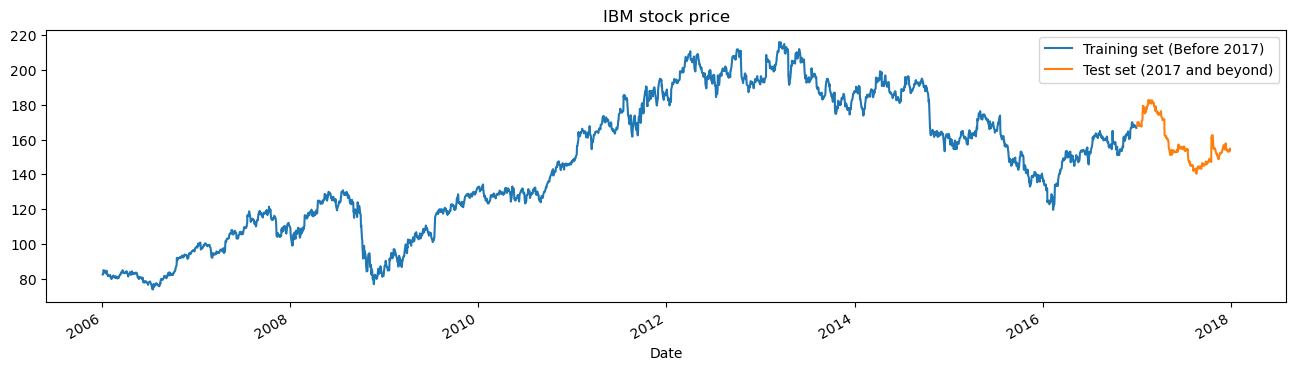

In [21]:
import matplotlib.pyplot as plt
# Plot the training set
df["High"][:'2016'].plot(figsize=(16, 4), legend=True)
# Plot the test set
df["High"]['2017':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2017)', 'Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()


In [22]:
trainning_set = df[:'2016'].iloc[:,1:2].values
test_set = df['2017':].iloc[:,1:2].values

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(trainning_set)

In [24]:
import numpy as np
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
  X_train.append(training_set_scaled[i - 60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=30))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1))


regressor.compile(optimizer='adam',loss='mean_squared_error')

C:\Users\Tanuja\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - loss: 0.0628
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 0.0089
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.0074
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - loss: 0.0075
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 0.0070
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.0068
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 0.0058
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 0.0060
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.0051
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - loss: 0.0050
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 0.0050
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.0050
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.0042
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 0.0039
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [27]:
# pre-processing the data
dataset_total = pd.concat((df["High"][:'2016'],df["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# making the test data
X_test = []
for i in range(60,len(inputs)):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step


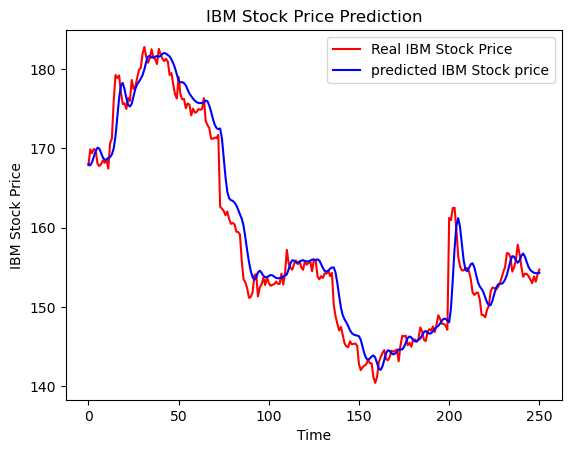

In [28]:
def plot_prediction(test,prediction):
    plt.plot(test,color='red',label="Real IBM Stock Price")
    plt.plot(prediction, color="blue",label="predicted IBM Stock price")
    plt.title("IBM Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("IBM Stock Price")
    plt.legend()
    plt.show()
# now we'll use this function to visualize our test and predicted data

plot_prediction(test_set,predicted_stock_price)

In [48]:
import math
from sklearn.metrics import mean_squared_error
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test,predicted))
    print("The root mean sqaured error is {}.".format(rmse))
return_rmse(test_set,predicted_stock_price)

The root mean sqaured error is 3.806116025372974.


In [30]:
from keras.layers import GRU, Dropout, Dense

In [31]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.3))
# Second GRU layer
regressorGRU.add(GRU(units=80, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.1))
# Fourth GRU layer
regressorGRU.add(GRU(units=30, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

# Compiling the RNN
regressorGRU.compile(optimizer='adam',loss='mean_squared_error')

# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

C:\Users\Tanuja\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 376ms/step - loss: 0.1042
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 380ms/step - loss: 0.0114
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 347ms/step - loss: 0.0064
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step - loss: 0.0057
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 371ms/step - loss: 0.0049
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 380ms/step - loss: 0.0054
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - loss: 0.0052
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - loss: 0.0050
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 358ms/step - loss: 0.0049
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - loss: 0.0044
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 359ms/step - loss: 0.0044
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 362ms/step - loss: 0.0044
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - loss: 0.0047
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 355ms/step - loss: 0.0043
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 393ms/step - l

In [32]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressorGRU.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step


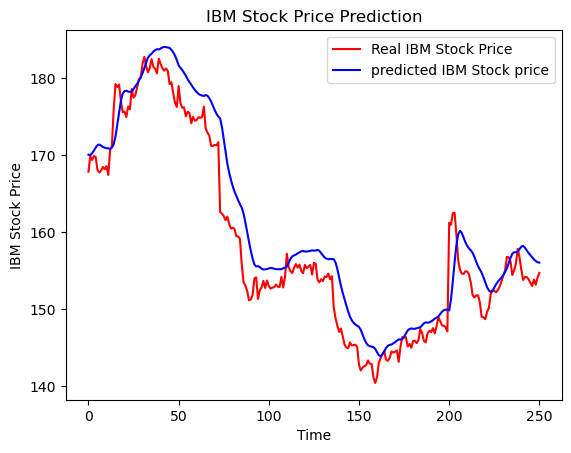

In [33]:
plot_prediction(test_set,predicted_stock_price)